In [1]:
from keras.preprocessing import image
import matplotlib.pyplot as plt


Using TensorFlow backend.


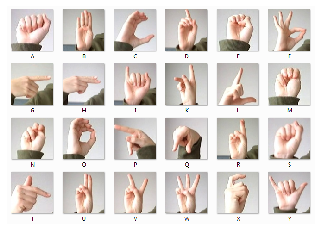

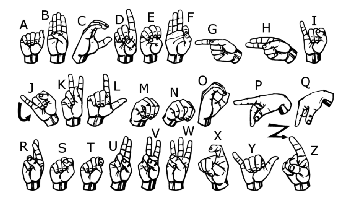

In [2]:
img= image.load_img('amer_sign2.png')
img=image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()
img2=image.load_img('american_sign_language.PNG')
img2=image.img_to_array(img2)/255.0
plt.imshow(img2)
plt.axis("off")
plt.show()

In [3]:
import pandas as pd
import numpy as np

train_data= pd.read_csv("sign_mnist_train.csv",index_col=None)
test_data= pd.read_csv("sign_mnist_test.csv",index_col=None)
print(train_data.shape,test_data.shape,sep="\n")

(27455, 785)
(7172, 785)


In [4]:
column1=train_data.columns
column2=test_data.columns

In [5]:
print(column1,column2,sep='\n')

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [6]:
print(train_data.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [7]:
train_img=train_data.iloc[:,1:].values
train_labels=train_data.iloc[:,0].values
test_img= test_data.iloc[0:,1:].values
test_labels= test_data.iloc[:,0].values

In [8]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [9]:
train_img=np.array([np.reshape(i, (28, 28)) for i in train_img])
test_img=np.array([np.reshape(i, (28, 28)) for i in test_img])

In [10]:
print(train_img.shape,train_labels.shape)
print(test_img.shape,test_labels.shape)

(27455, 28, 28) (27455,)
(7172, 28, 28) (7172,)


In [11]:
from sklearn.preprocessing import OneHotEncoder

train_labels=train_labels.reshape(-1,1)
test_labels=test_labels.reshape(-1,1)

one=OneHotEncoder()
train_labels=one.fit_transform(train_labels).toarray()
test_labels=one.fit_transform(test_labels).toarray()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [12]:
print(train_img.shape,train_labels.shape)
print(test_img.shape,test_labels.shape)

(27455, 28, 28) (27455, 24)
(7172, 28, 28) (7172, 24)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(train_img,train_labels,test_size=0.2)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,sep="\n")

(21964, 28, 28)
(21964, 24)
(5491, 28, 28)
(5491, 24)


In [14]:
x_train=np.expand_dims(x_train,axis=3)
test_img=np.expand_dims(test_img,axis=3)
x_val=np.expand_dims(x_val,axis=3)

In [15]:
print(x_train.shape)
print(test_img.shape)
print(x_val.shape)

(21964, 28, 28, 1)
(7172, 28, 28, 1)
(5491, 28, 28, 1)


In [16]:
from keras.models import Sequential
from keras.optimizers import adam
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [17]:
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(24,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [18]:
his=model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
print(x_train.shape,y_train.shape)

(21964, 28, 28, 1) (21964, 24)


In [20]:
his=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5)

Train on 21964 samples, validate on 5491 samples
Epoch 1/5
21964/21964 [==============================] - 24s 1ms/step - loss: 2.7486 - accuracy: 0.2047 - val_loss: 0.9323 - val_accuracy: 0.7463
Epoch 2/5
21964/21964 [==============================] - 22s 1ms/step - loss: 0.7208 - accuracy: 0.7608 - val_loss: 0.0573 - val_accuracy: 0.9863
Epoch 3/5
21964/21964 [==============================] - 27s 1ms/step - loss: 0.2390 - accuracy: 0.9255 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 4/5
21964/21964 [==============================] - 28s 1ms/step - loss: 0.1463 - accuracy: 0.9580 - val_loss: 0.0947 - val_accuracy: 0.9796
Epoch 5/5
21964/21964 [==============================] - 24s 1ms/step - loss: 0.1239 - accuracy: 0.9696 - val_loss: 0.0122 - val_accuracy: 0.9960


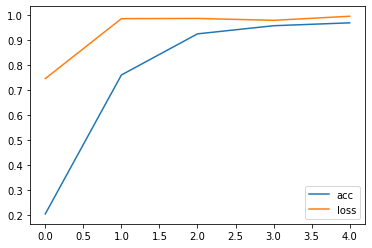

In [21]:
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'],label='acc')
plt.plot(his.history['val_accuracy'],label='loss')
plt.legend()
plt.show()


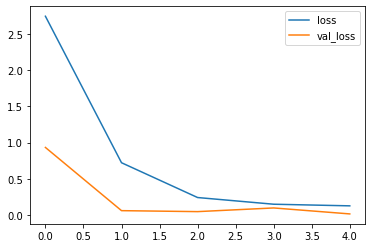

In [22]:
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [23]:
x=model.evaluate(test_img,test_labels)

7172/7172 [==============================] - 2s 300us/step


In [24]:
model_accuracy=x[1]
print(model_accuracy)


0.9068599939346313
